## Joseph Farag

# Is free throw shooting a good way to evaluate a basketball player's three point shooting ability?

Basketball is a sport that is evaluated with many statistics. One of the key aspects that can be observed is a player's individual shooting statistics. When evaluating young prospects with potential or players further along in their career, a key aspect of a player's potential in one area can be linked to another key statistic that you may have a lot of data on. Shooting is one of the main components of the sport of basketball, and as the analytics of the sport have evolved, the three point shot has become arguably the most important shot in the game, due to its high value. Sometimes when evaluating a player's three point shooting ability, it can be hard to evaluate an opponents ability to shoot the three point shot, due to either a small sample size or just a potential cold streak. One potential way to assess a players ability to shoot three pointers is to determine whether their free throw percentage has a significant impact on their three point percentage. The free throw is the most consistent shot a player is going to take, and so potentially is a greater determinant of a player's overall shooting ability.

### Reading in the Data
In this project, we are going to assess whether a player's free throw percentage is a good indicator of their three point percentage. To do this, we are going to access the season 2020-21 statistics of all individual players in the nba. We read in the data below:

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nba = pd.read_csv(r"C:\Users\joefa\OneDrive\Documents\Projects\2020_21_NBA_Player_Stats_Per_Game.csv")
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


### Cleaning the Data
From the table above, it's important we clean the dataset by setting minimum requirements for the players to surpass in certain statistics to have a valid dataset. Firstly, we'll make sure our dataset only has players that have played over half of the season(36 games).

In [108]:
nba2 = nba[nba['G'] >= 36] #Restricting the dataset
nba2.shape

(369, 30)

Furthermore, we'll also set important requirements that each player must've shot atleast 1 free throw and three point attempt per game.

In [109]:
nba3 = nba2[nba2['FTA'] >= 1]
nba4 = nba3[nba3['3PA'] >= 1]
nba4.shape

(220, 30)

Our dataset currently has too many columns that are unimportant to our end goal, and so we create a new dataframe using only the columns that are important to our study.

In [118]:
nba_df = pd.DataFrame(data=nba4, columns = ['Player', 'Pos', 'G', 'FT', 'FTA','FT%', '3P', '3PA', '3P%']) #establish new dataframe
nba_df.head()

,Player,Pos,G,FT,FTA,FT%,3P,3PA,3P%
8,Nickeil Alexander-Walker,SG,46,1.0,1.4,0.727,1.7,4.8,0.347
9,Grayson Allen,SG,50,1.6,1.8,0.868,2.1,5.5,0.391
16,Kyle Anderson,PF,69,2.1,2.7,0.783,1.4,3.8,0.360
17,Giannis Antetokounmpo,PF,61,6.5,9.5,0.685,1.1,3.6,0.303
20,Carmelo Anthony,PF,69,2.0,2.2,0.890,1.9,4.7,0.409


### Investigating the Data
To initially visualize the relationship between the two percentage variables, we'll plot a linear regression plot to estimate if their appears to be any relationship between the two.

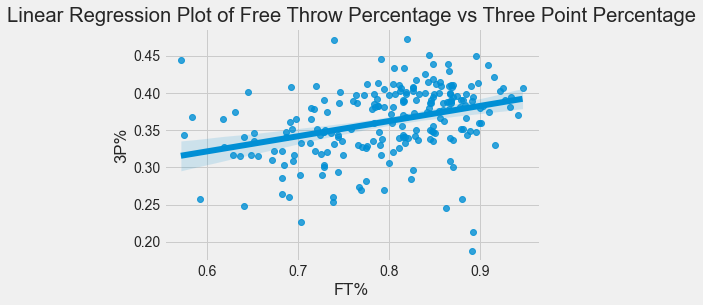

In [145]:
plt.style.use("fivethirtyeight") #create specific style for plots
sns.regplot(x=nba_df['FT%'], y=nba_df['3P%'])
plt.ylabel("3P%")
plt.xlabel("FT%")
plt.title('Linear Regression Plot of Free Throw Percentage vs Three Point Percentage')
plt.show()

Initially, their does appear to be a relationship between the two variables, albeit not largely significant. We confirm this with the correlation below.

In [121]:
nba_df['3P%'].corr(nba_df['FT%']) #correlation statistic

0.3417581833069215

One way to further analyze the data is to split the data into above and below average shooter categories in both free throw percentages, and three point percentages. We'll see if there's a significant difference between the binary categories to signify a relationship, by determining how many above average free throw shooters are also above average three point shooters.

In [122]:
three_mean = nba_df['3P%'].mean()
FT_mean = nba_df['FT%'].mean()

In [123]:
nba_df['ft_ranking'] = nba_df['FT%'].apply(lambda x: 'Above Average' if x >= FT_mean else 'Below Average')
nba_df['3p_ranking'] = nba_df['3P%'].apply(lambda x: 'Above Average' if x >= three_mean else 'Below Average')
nba_df.head() #establishing new variables

,Player,Pos,G,FT,FTA,FT%,3P,3PA,3P%,ft_ranking,3p_ranking
8,Nickeil Alexander-Walker,SG,46,1.0,1.4,0.727,1.7,4.8,0.347,Below Average,Below Average
9,Grayson Allen,SG,50,1.6,1.8,0.868,2.1,5.5,0.391,Above Average,Above Average
16,Kyle Anderson,PF,69,2.1,2.7,0.783,1.4,3.8,0.360,Below Average,Below Average
17,Giannis Antetokounmpo,PF,61,6.5,9.5,0.685,1.1,3.6,0.303,Below Average,Below Average
20,Carmelo Anthony,PF,69,2.0,2.2,0.890,1.9,4.7,0.409,Above Average,Above Average


In [128]:
above_average_ft = nba_df[nba_df['ft_ranking'] == 'Above Average']
three_total = above_average_ft[above_average_ft['3p_ranking'] == 'Above Average'].shape[0]
good_shooters = three_total / above_average_ft.shape[0]
good_shooter_pct = good_shooters*100
print("The percentage of above average free throw shooters also being above average three point shooters is {}%".format(good_shooter_pct))

The percentage of above average free throw shooters also being above average three point shooters is 68.8%


The majority of above average free throw shooters are also above average three point shooters. We'll also check to see how many of below average free throw shooters are above average three point shooters.

In [135]:
below_average_ft = nba_df[nba_df['ft_ranking'] == 'Below Average']
three_total2 = below_average_ft[below_average_ft['3p_ranking'] == 'Above Average'].shape[0]
bad_shooters = three_total2 / below_average_ft.shape[0]
bad_shooter_pct = round(bad_shooters*100,2)
print("The percentage of below average free throw shooters being above average three point shooters is approximately {}%".format(bad_shooter_pct))

The percentage of below average free throw shooters being above average three point shooters is approximately 33.68%


### Plotting the Data

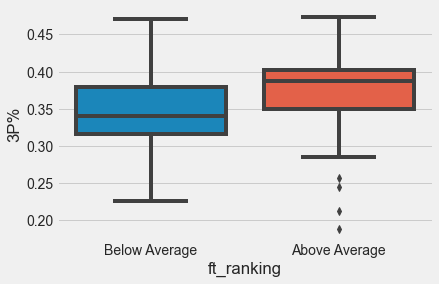

In [142]:
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.boxplot(x=nba_df['ft_ranking'], y = nba_df['3P%'])
plt.show()

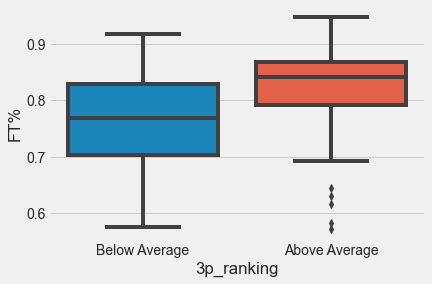

In [144]:
plt.style.use("fivethirtyeight")
sns.boxplot(x=nba_df['3p_ranking'], y=nba_df['FT%'])
plt.show()

Despite a few clear outliers above, the boxplots indicate that there is a relationship between an individual player's free throw percentage and their three point relationships. We also made a box plot of the opposite side of the relationship, which indicates there's a relationship between the two both ways.

### Conclusions
From the above investigations, there appears to be a relationship between the two variables. We can see that a player's free throw percentage is a decent indicator of a player's three point shooting ability, albeit not perfect. A potential way to further investigate would be looking at more years and dataset's as well as investigating potentially another league to see how universally strong the relationship is. We conclude that there appears to be a relationship, and is potentially worth investigating further.